### Filtro Pasa Bajos Butterworth de Orden 3 Prototipo Normalizado

<IPython.core.display.Math object>

### Filtro Pasa Altos Butterworth de Orden 3 Normalizado

<IPython.core.display.Math object>

### Simulación Numérica

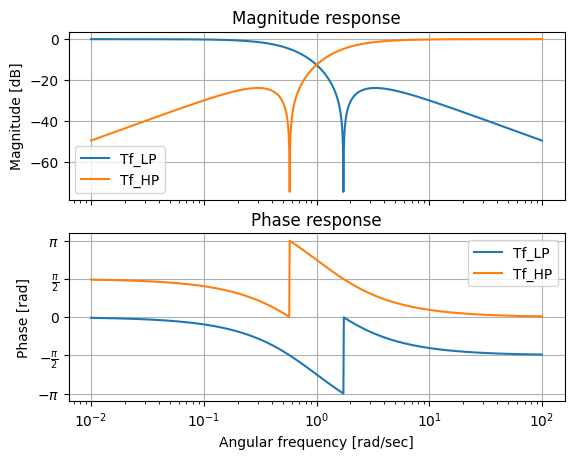

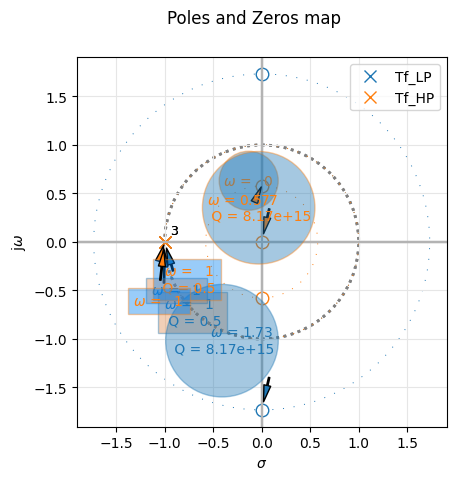

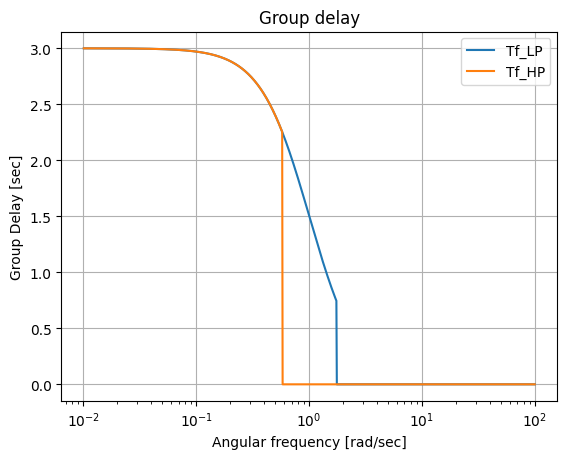

In [16]:
# Módulos externos

import sympy as sp
from sympy.abc import s
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle
import numpy as np
import scipy.signal as sig
from IPython.display import display, Markdown

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys


# coeficientes de la transferencia Pasabajos Prototipo
Tlp_num = np.array([1/3, 0, 1])
den_aux = np.polymul([1, 1], [1, 2, 1])
Tlp_den = np.array(den_aux)

# Visualización de Pasabajos Prototipo 
num_hp, den_hp = sig.lp2hp(Tlp_num, Tlp_den)

display(Markdown('### Filtro Pasa Bajos Butterworth de Orden 3 Prototipo Normalizado' ))

pretty_print_lti(Tlp_num, Tlp_den)

# Transformación y Visualización de Pasabajos Prototipo a Pasaaltos Requerido
num_hp, den_hp = sig.lp2hp(Tlp_num, Tlp_den)

display(Markdown('### Filtro Pasa Altos Butterworth de Orden 3 Normalizado' ))

pretty_print_lti(num_hp, den_hp)


# Simulación Numérica

display(Markdown('### Simulación Numérica' ))

Tf_LP = TransferFunction(Tlp_num,Tlp_den)
Tf_HP = TransferFunction(num_hp,den_hp)

analyze_sys( Tf_LP, 'Tf_LP' )
analyze_sys( Tf_HP, 'Tf_HP' )